In [1]:
import pandas as pd
import data_loader as dl
import re
import math
import ast

RDKit WARNING: [07:32:14] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
#Read in data
bulk_rep1 = dl.load_joined_psm_mzml('bulk_rep1')
bulk_rep2 = dl.load_joined_psm_mzml('bulk_rep2')
bulk_rep3 = dl.load_joined_psm_mzml('bulk_rep3')

rep1_2ng = dl.load_joined_psm_mzml("2ng_rep1")
rep2_2ng = dl.load_joined_psm_mzml("2ng_rep2")
rep3_2ng = dl.load_joined_psm_mzml("2ng_rep3")
rep4_2ng = dl.load_joined_psm_mzml("2ng_rep4")
rep5_2ng = dl.load_joined_psm_mzml("2ng_rep5")
rep6_2ng = dl.load_joined_psm_mzml("2ng_rep6")

rep1_02ng = dl.load_joined_psm_mzml("0.2ng_rep1")
rep2_02ng = dl.load_joined_psm_mzml("0.2ng_rep2")
rep3_02ng = dl.load_joined_psm_mzml("0.2ng_rep3")
rep4_02ng = dl.load_joined_psm_mzml("0.2ng_rep4")
rep5_02ng = dl.load_joined_psm_mzml("0.2ng_rep5")
rep6_02ng = dl.load_joined_psm_mzml("0.2ng_rep6")

rep1_sc = dl.load_joined_psm_mzml("sc_rep1")
rep2_sc = dl.load_joined_psm_mzml("sc_rep2")
rep3_sc = dl.load_joined_psm_mzml("sc_rep3")
rep4_sc = dl.load_joined_psm_mzml("sc_rep4")
rep5_sc = dl.load_joined_psm_mzml("sc_rep5")

In [3]:
#filter based on retention time gradient
rep1_2ng = rep1_2ng[(rep1_2ng['minute'] < 95) & (rep1_2ng['minute'] >= 27)]
rep2_2ng = rep2_2ng[(rep2_2ng['minute'] < 95) & (rep2_2ng['minute'] >=27)]
rep3_2ng = rep3_2ng[(rep3_2ng['minute'] < 93) & (rep3_2ng['minute'] >=32)]
rep4_2ng = rep4_2ng[(rep4_2ng['minute'] < 91) & (rep4_2ng['minute'] >=32)]
rep5_2ng = rep5_2ng[(rep5_2ng['minute'] < 99) & (rep5_2ng['minute'] >=31)]
rep6_2ng = rep6_2ng[(rep6_2ng['minute'] < 98) & (rep6_2ng['minute'] >=31)]

rep1_02ng = rep1_02ng[(rep1_02ng['minute'] < 94) & (rep1_02ng['minute'] >=28)]
rep2_02ng = rep2_02ng[(rep2_02ng['minute'] < 95) & (rep2_02ng['minute'] >=27)]
rep3_02ng = rep3_02ng[(rep3_02ng['minute'] < 98) & (rep3_02ng['minute'] >=32)]
rep4_02ng = rep4_02ng[(rep4_02ng['minute'] < 98) & (rep4_02ng['minute'] >=32)]
rep5_02ng = rep5_02ng[(rep5_02ng['minute'] < 109) & (rep5_02ng['minute'] >=35)]
rep6_02ng = rep6_02ng[(rep6_02ng['minute'] < 109) & (rep6_02ng['minute'] >=35)]

In [4]:
def count_total_peaks(row):
    return len(ast.literal_eval(row['intensity_array']))

In [7]:
def peak_count_wrapper(df):
    df['total_peak_count'] = df.apply(count_total_peaks,axis=1)

    #seprate good and medicore spectra
    df_good = df[df['QValue'] <= .01]
    df_med = df[(df['QValue'] > .01) & (df['QValue'] <= .2)]

    return [df_good, df_med]
    

In [8]:
rep1_sc_totalpeak_good, rep1_sc_totalpeak_med = peak_count_wrapper(rep1_sc)
rep2_sc_totalpeak_good, rep2_sc_totalpeak_med = peak_count_wrapper(rep2_sc)
rep3_sc_totalpeak_good, rep3_sc_totalpeak_med = peak_count_wrapper(rep3_sc)
rep4_sc_totalpeak_good, rep4_sc_totalpeak_med = peak_count_wrapper(rep4_sc)
rep5_sc_totalpeak_good, rep5_sc_totalpeak_med = peak_count_wrapper(rep5_sc)

rep1_02ng_totalpeak_good, rep1_02ng_totalpeak_med = peak_count_wrapper(rep1_02ng)
rep2_02ng_totalpeak_good, rep2_02ng_totalpeak_med = peak_count_wrapper(rep2_02ng)
rep3_02ng_totalpeak_good, rep3_02ng_totalpeak_med = peak_count_wrapper(rep3_02ng)
rep4_02ng_totalpeak_good, rep4_02ng_totalpeak_med = peak_count_wrapper(rep4_02ng)
rep5_02ng_totalpeak_good, rep5_02ng_totalpeak_med = peak_count_wrapper(rep5_02ng)
rep6_02ng_totalpeak_good, rep6_02ng_totalpeak_med = peak_count_wrapper(rep6_02ng)

rep1_2ng_totalpeak_good, rep1_2ng_totalpeak_med = peak_count_wrapper(rep1_2ng)
rep2_2ng_totalpeak_good, rep2_2ng_totalpeak_med = peak_count_wrapper(rep2_2ng)
rep3_2ng_totalpeak_good, rep3_2ng_totalpeak_med = peak_count_wrapper(rep3_2ng)
rep4_2ng_totalpeak_good, rep4_2ng_totalpeak_med = peak_count_wrapper(rep4_2ng)
rep5_2ng_totalpeak_good, rep5_2ng_totalpeak_med = peak_count_wrapper(rep5_2ng)
rep6_2ng_totalpeak_good, rep6_2ng_totalpeak_med = peak_count_wrapper(rep6_2ng)

bulkrep1_totalpeak_good, bulkrep1_totalpeak_med = peak_count_wrapper(bulk_rep1)
bulkrep2_totalpeak_good, bulkrep2_totalpeak_med = peak_count_wrapper(bulk_rep2)
bulkrep3_totalpeak_good, bulkrep3_totalpeak_med = peak_count_wrapper(bulk_rep3)

In [9]:
allsc_good = pd.concat([rep1_sc_totalpeak_good,rep2_sc_totalpeak_good,rep3_sc_totalpeak_good,
                        rep4_sc_totalpeak_good,rep5_sc_totalpeak_good])
allsc_med = pd.concat([rep1_sc_totalpeak_med,rep2_sc_totalpeak_med,rep3_sc_totalpeak_med,
                        rep4_sc_totalpeak_med,rep5_sc_totalpeak_med])

all02ng_good = pd.concat([rep1_02ng_totalpeak_good,rep2_02ng_totalpeak_good,rep3_02ng_totalpeak_good,
                        rep4_02ng_totalpeak_good,rep5_02ng_totalpeak_good,rep6_02ng_totalpeak_good])
all02ng_med = pd.concat([rep1_02ng_totalpeak_med,rep2_02ng_totalpeak_med,rep3_02ng_totalpeak_med,
                        rep4_02ng_totalpeak_med,rep5_02ng_totalpeak_med,rep6_02ng_totalpeak_med])

all2ng_good = pd.concat([rep1_2ng_totalpeak_good,rep2_2ng_totalpeak_good,rep3_2ng_totalpeak_good,
                        rep4_2ng_totalpeak_good,rep5_2ng_totalpeak_good,rep6_2ng_totalpeak_good])
all2ng_med = pd.concat([rep1_2ng_totalpeak_med,rep2_2ng_totalpeak_med,rep3_2ng_totalpeak_med,
                        rep4_2ng_totalpeak_med,rep5_2ng_totalpeak_med,rep6_2ng_totalpeak_med])

all_bulk_good = pd.concat([bulkrep1_totalpeak_good,bulkrep2_totalpeak_good,bulkrep3_totalpeak_good])
all_bulk_med = pd.concat([bulkrep1_totalpeak_med,bulkrep2_totalpeak_med,bulkrep3_totalpeak_med])


# Calculations used in manuscript

In [11]:
all_bulk_good['total_peak_count'].mean()

682.1705667062511

In [12]:
all2ng_good['total_peak_count'].mean()

104.2308310852874

In [13]:
all02ng_good['total_peak_count'].mean()

86.89328717639975

In [14]:
allsc_good['total_peak_count'].mean()

98.36699329551315

# Data exploration

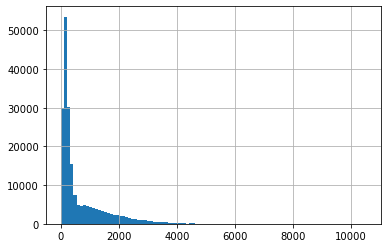

In [8]:
all_bulk_good['total_peak_count'].hist(bins=100)

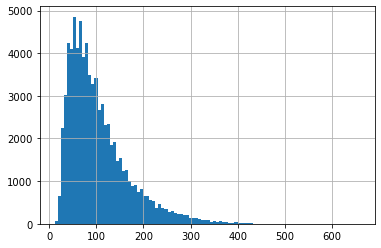

In [12]:
all2ng_good['total_peak_count'].hist(bins=100)

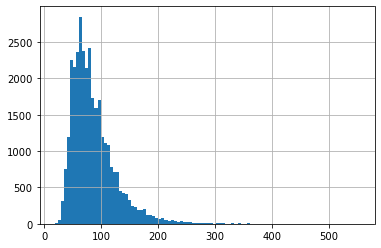

In [13]:
all02ng_good['total_peak_count'].hist(bins=100)

In [ ]:
print('Bulk 90% of spectra have this many peaks:')
len(all_bulk_good[all_bulk_good['total_peak_count'] >= .5])/len(all_bulk_good)

In [17]:
all_bulk_good['total_peak_count'].value_counts()

127     682
133     681
122     679
118     668
124     661
       ... 
4413      1
4313      1
4218      1
4185      1
3348      1
Name: total_peak_count, Length: 4745, dtype: int64

In [18]:
all2ng_good['total_peak_count'].value_counts()

62     720
47     719
52     715
53     713
54     708
      ... 
433      1
442      1
471      1
452      1
487      1
Name: total_peak_count, Length: 442, dtype: int64

In [19]:
all02ng_good['total_peak_count'].value_counts()

65     512
68     506
69     504
61     500
58     483
      ... 
332      1
300      1
357      1
378      1
543      1
Name: total_peak_count, Length: 329, dtype: int64

In [40]:
(len(all02ng_good[all02ng_good['total_peak_count'] <= 111]))/(len(all02ng_good['total_peak_count']))

0.8005418422636966

In [43]:
(len(all2ng_good[all2ng_good['total_peak_count'] <= 149]))/(len(all2ng_good['total_peak_count']))

0.8072084457356298

In [49]:
(len(all_bulk_good[all_bulk_good['total_peak_count'] <= 1200]))/(len(all_bulk_good['total_peak_count']))

0.8014678684758697

In [57]:
(len(all_bulk_good[all_bulk_good['total_peak_count'] >= 100]))/(len(all_bulk_good['total_peak_count']))

0.9275361613487259

In [62]:
(len(all2ng_good[all2ng_good['total_peak_count'] >= 40]))/(len(all2ng_good['total_peak_count']))

0.9077220377671716

In [79]:
(len(all02ng_good[all02ng_good['total_peak_count'] >= 48]))/(len(all02ng_good['total_peak_count']))

0.910565924142083

In [9]:
all_bulk_good['total_peak_count'].mean()

682.1705667062511

In [83]:
all_bulk_good['total_peak_count'].median()

289.0

In [81]:
all2ng_good['total_peak_count'].mean()

104.2308310852874

In [84]:
all2ng_good['total_peak_count'].median()

88.0

In [82]:
all02ng_good['total_peak_count'].mean()

86.89328717639975

In [85]:
all02ng_good['total_peak_count'].median()

78.0

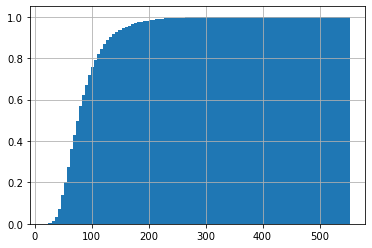

In [25]:
all02ng_good['total_peak_count'].hist(cumulative=True, density=1, bins=100)

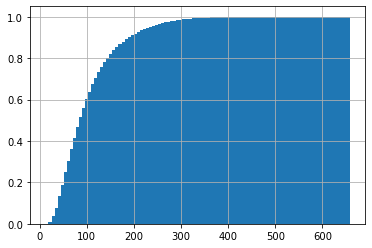

In [26]:
all2ng_good['total_peak_count'].hist(cumulative=True, density=1, bins=100)

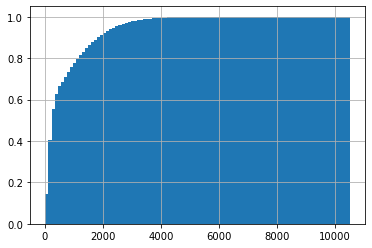

In [27]:
all_bulk_good['total_peak_count'].hist(cumulative=True, density=1, bins=100)

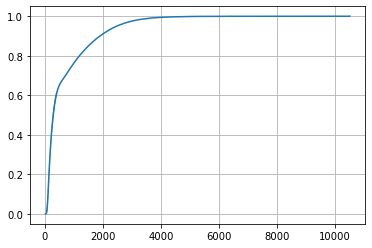

In [22]:
import matplotlib.pyplot as plt

import numpy as np

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
    
plot_ecdf(all_bulk_good['total_peak_count'])

In [13]:
all_bulk_good['total_peak_count'].mean()

682.1705667062511

In [26]:
all_bulk_good['Matched Ion Counts'].mean()

13.434714894776802

In [27]:
all2ng_good['total_peak_count'].mean()

104.2308310852874

In [29]:
all2ng_good['Matched Ion Counts'].mean()

10.610603859721934